In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame as df
from MSM_util import *
from lmfit import minimize, Minimizer, Parameters, Parameter, report_fit
import sys, scipy, numpy

# print(scipy.__version__, numpy.__version__, sys.version_info)

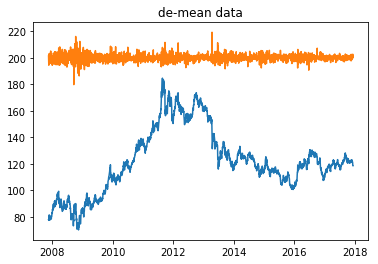

In [4]:
# Hyper parameters

# How much period taken into calculation and prediction
m = 20
# number of days prediction
RV = 22
# kbar
kbar = 8

xls_data = pd.read_excel('data_GVZ_GLD.xlsx')
date_GLD = xls_data.iloc[:,3]
GLD = xls_data.loc[:,'GLD']

GLD2 = GLD.shift(1)
GLD2[0] = GLD[0]
GLD_r = GLD/GLD2

GLD_d = GLD_r - np.mean(GLD_r)
plt.plot(date_GLD,GLD)
plt.title('de-mean data')
plt.plot(date_GLD,200*GLD_r)

data = GLD_d[::-1]


startingvals = []#[1.2, 1.2, 0.5 , 1.2 ]
LB = [1, 1, 0.001, 0.0001]
UB = [1.99, 50, 0.99999, 5]
op_methods = 'slsqp'



plt.show()

# Fit data

In [5]:
output =msm_fitseries(data, kbar, LB, UB, op_methods, startingvals, m, RV)

==========init params=========
m0 =   1.2000
b =   1.2000
gamma_k =   0.5000
sigma =   1.2000


 ==========fitted results==========
optimization method = slsqp
m0 =   1.4127
b =  16.0276
gamma_k =   1.0000
sigma =   0.5538
LLs = -7856.8650
AIC =  25.9383
BIC =  17.9383
==========init params=========
m0 =   1.2000
b =   1.2000
gamma_k =   0.5000
sigma =   1.2000


 ==========fitted results==========
optimization method = slsqp
m0 =   1.4543
b =  36.4057
gamma_k =   0.9553
sigma =   0.5324
LLs = -7851.7147
AIC =  25.9370
BIC =  17.9370
==========init params=========
m0 =   1.2000
b =   1.2000
gamma_k =   0.5000
sigma =   1.2000


 ==========fitted results==========
optimization method = slsqp
m0 =   1.4135
b =  15.9286
gamma_k =   1.0000
sigma =   0.2302
LLs = -7861.5297
AIC =  25.9395
BIC =  17.9395
==========init params=========
m0 =   1.2000
b =   1.2000
gamma_k =   0.5000
sigma =   1.2000


 ==========fitted results==========
optimization method = slsqp
m0 =   1.4903
b =  48.7977
gam

In [17]:
a = output
a["GVZ"] = xls_data["GVZ"]
a

,RV,m0,b,gamma_k,sigma,GVZ
0,58.908934,1.412709,16.027562,0.999990,0.553819,11.70
1,54.437007,1.454264,36.405727,0.955288,0.532384,12.99
2,10.181589,1.413456,15.928611,0.999990,0.230242,11.67
3,232.131186,1.490289,48.797716,0.752164,1.099371,12.28
4,146.554266,1.464040,30.573865,0.985738,0.873528,11.38
5,7.848707,1.449170,49.740458,0.933462,0.202151,11.39
6,2035.617947,1.580546,49.710529,0.102797,3.255560,11.79
7,2.550069,1.508555,45.154232,0.815007,0.115227,11.02
8,11.906987,1.521554,49.975144,0.920141,0.248988,10.64
9,667.910691,1.559690,30.802417,0.127176,1.864819,10.72


## plot

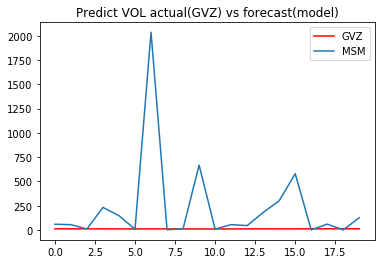

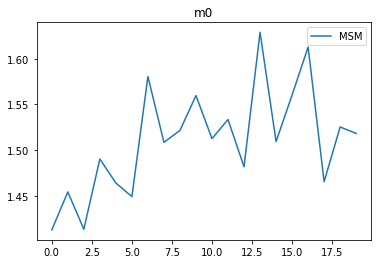

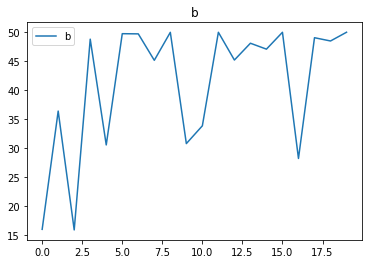

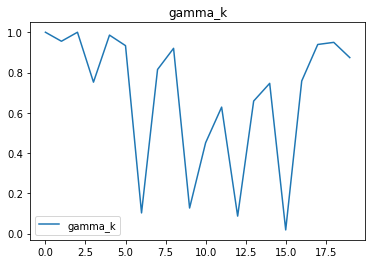

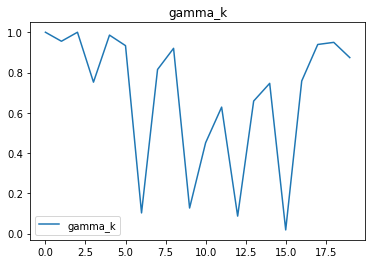

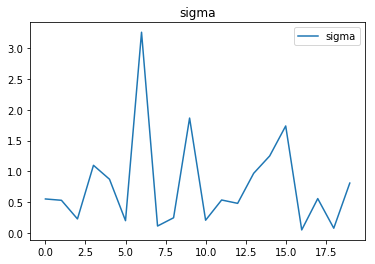

In [15]:
 msm_plot(xls_data["GVZ"], output, m)

## Regression

In [8]:
datainreg = xls_data["GVZ"][::-1]
data_lastm = datainreg
data_lastm = data_lastm.iloc[-m:]

linreg(df(output['RV']), df(data_lastm))

Slope :  -0.000660505652855
Intercept :  11.3649091073


(-0.00066050565285520808, 11.364909107349215)

## XLSX

In [7]:
from datetime import date
text = 'MSM_fitparam'
namew=text + "_kbar" + str(kbar)+ "_RV" + str(22) +'_m' +str(m)+".xlsx"
writer = pd.ExcelWriter("".join((date.today().strftime('%y%m%d'),namew)))
print(writer.path)
output.to_excel(writer, 'Sheet2')
writer.save()

180210MSM_fitparam_kbar8_RV22_m20.xlsx


### load

In [4]:
xls_file = pd.ExcelFile('180209RV22m10.xlsx')
output = xls_file.parse('Sheet2')

# Average params

In [8]:
output2 = msm_averageparams(output, kbar, m, data, RV, LB , UB)

In [12]:
output2

,RV,m0,b,gamma_k,sigma
0,117.843558,1.510138,41.154463,0.685101,0.783304
1,117.843558,1.510138,41.154463,0.685101,0.783304
2,117.843558,1.510138,41.154463,0.685101,0.783304
3,117.843558,1.510138,41.154463,0.685101,0.783304
4,117.843558,1.510138,41.154463,0.685101,0.783304
5,117.843558,1.510138,41.154463,0.685101,0.783304
6,117.843558,1.510138,41.154463,0.685101,0.783304
7,117.843558,1.510138,41.154463,0.685101,0.783304
8,117.843558,1.510138,41.154463,0.685101,0.783304
9,117.843558,1.510138,41.154463,0.685101,0.783304


## plot

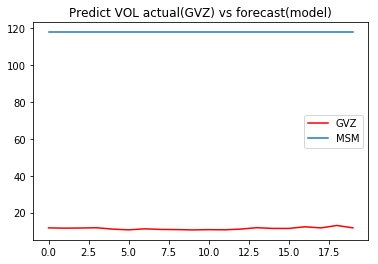

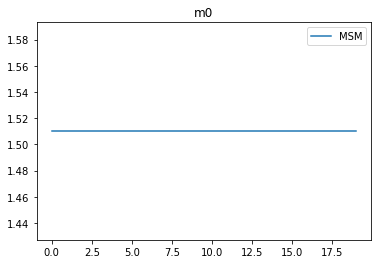

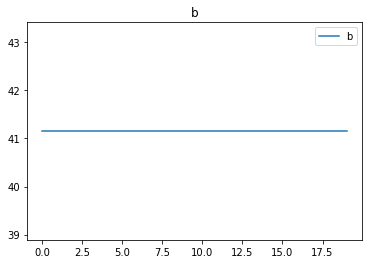

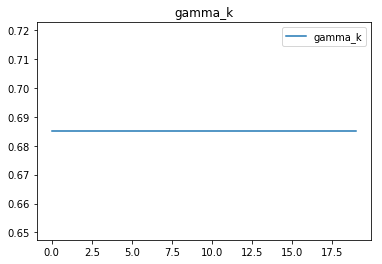

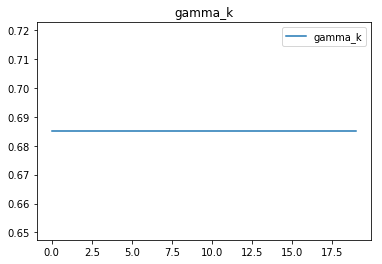

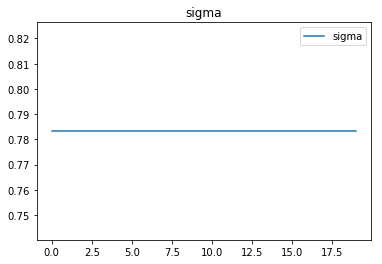

In [9]:
 msm_plot(xls_data["GVZ"], output2, m)

## Regression

In [10]:
datainreg = xls_data["GVZ"][::-1]
data_lastm = datainreg
data_lastm = data_lastm.iloc[-m:]

linreg(df(output2['RV']), df(data_lastm))

Slope :  -1.49419346403e+12
Intercept :  1.76081074789e+14


(-1494193464032.2129, 176081074788859.75)